In [1]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist_train=pd.read_csv('train.csv')

In [3]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label=mnist_train["label"]

In [5]:
pixels=mnist_train.drop("label",axis=1)

In [6]:
print(label.shape)

(42000,)


In [7]:
print(pixels.shape)

(42000, 784)


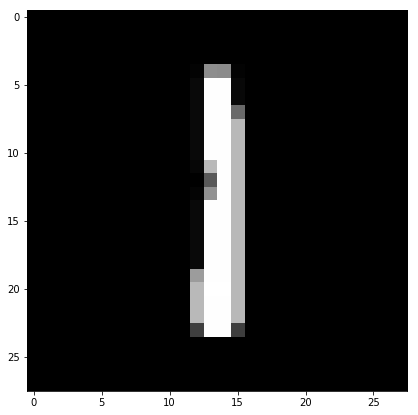

1


In [8]:
plt.figure(figsize=(7,7))
idx=2

grid_data=pixels.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

print(label[idx])

# 2D Visualization Using PCA

In [9]:
#labels=label.head(15000)
#pixels=pixels.head(15000)

In [10]:
print("the shape of sample data is:" ,pixels.shape)

the shape of sample data is: (42000, 784)


In [11]:
#Data Proprocessing : standardizing the data

from sklearn.preprocessing import StandardScaler

In [12]:
standardized_data=StandardScaler().fit_transform(pixels)

print(standardized_data.shape)

(42000, 784)


In [13]:
sample_data=standardized_data

covar_matrix=np.matmul(sample_data.T,sample_data)

print("the shape of covariance matrix is :",covar_matrix.shape)

the shape of covariance matrix is : (784, 784)


In [14]:
from scipy.linalg import eigh

values,vectors=eigh(covar_matrix,eigvals=(782,783))

print("shape pf eigen vectors =",vectors.shape)

vectors=vectors.T

print("updated shape of eigen vectors =",vectors.shape)

shape pf eigen vectors = (784, 2)
updated shape of eigen vectors = (2, 784)


In [15]:
import matplotlib.pyplot as plt

new_coordinates=np.matmul(vectors,sample_data.T)

print("resultant new data points",vectors.shape,"X",sample_data.T.shape,"=",new_coordinates.shape)

resultant new data points (2, 784) X (784, 42000) = (2, 42000)


In [16]:
import pandas as pd

new_coordinates=np.vstack((new_coordinates,label)).T

dataframe=pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","label"))
#pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


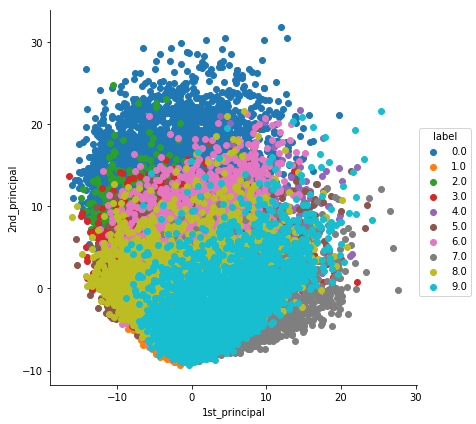

In [17]:
import seaborn as sns

sns.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
#sns.FacetGrid(pca_df,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [18]:
from sklearn import decomposition

pca=decomposition.PCA()

In [19]:
pca.n_components=2

pca_data=pca.fit_transform(sample_data)

In [20]:
print("shape of pca_reduced.shape =",pca_data.shape)

shape of pca_reduced.shape = (42000, 2)


In [21]:
pca_data=np.vstack((pca_data.T,label)).T

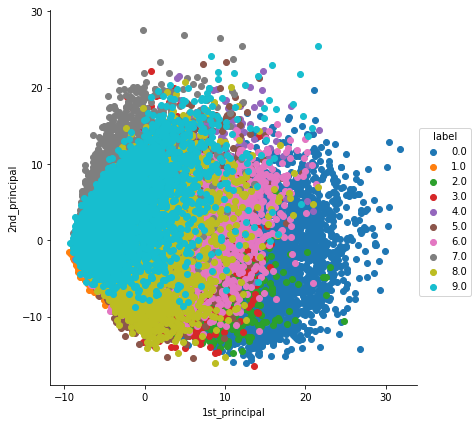

In [22]:
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))

sns.FacetGrid(pca_df,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()

In [23]:
pca_data.shape

(42000, 3)

# PCA for dimensionality reduction(not for visualization)

In [24]:
pca.n_components=784

pda_data=pca.fit_transform(sample_data)

In [25]:
percentage_variance_explained=pca.explained_variance_/np.sum(pca.explained_variance_)

Text(0,0.5,'cumulative_variance_explained')

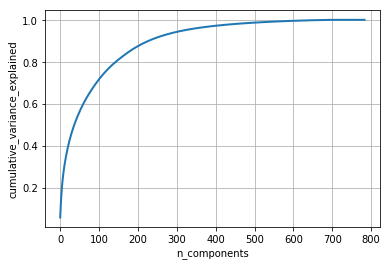

In [26]:
cum_var_explained=np.cumsum(percentage_variance_explained)

plt.figure(1,figsize=(6,4))
plt.plot(cum_var_explained,linewidth=2)
plt.grid()

plt.axis('tight')

plt.xlabel("n_components")
plt.ylabel("cumulative_variance_explained")

# t-SNE Using Scikit-Learn

In [27]:
from sklearn.manifold import TSNE

In [29]:
model=TSNE(n_components=2,random_state=0)
# default perplexity = 30
# default Maximum number of iterations for the optimization = 1000

In [30]:
tsne_data=model.fit_transform(standardized_data)

In [31]:
tsne_data=np.vstack((tsne_data.T,label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

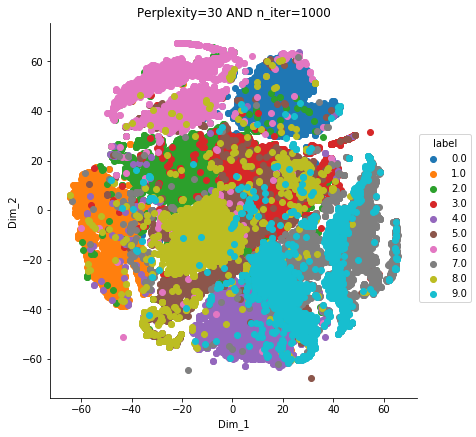

In [34]:
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.title("Perplexity=30 AND n_iter=1000")
plt.show()

In [33]:
model1=TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data1=model1.fit_transform(standardized_data)

In [35]:
#Creating a dataframe which help us in plotting the result data
tsne_data1=np.vstack((tsne_data1.T,label)).T
tsne_df1=pd.DataFrame(data=tsne_data1,columns=("Dim_1","Dim_2","label"))

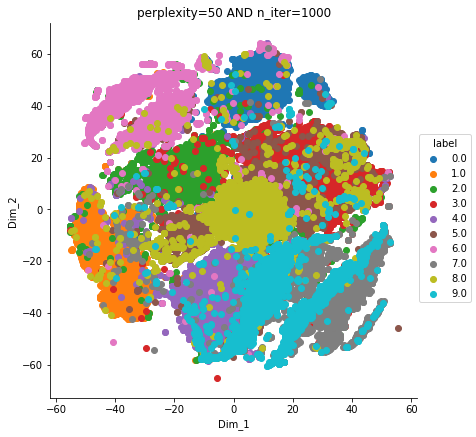

In [36]:
sns.FacetGrid(tsne_df1,hue="label",size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.title("perplexity=50 AND n_iter=1000")
plt.show()

In [ ]:
#TSNE model with perplexity=50 and n_iterations=5000

In [37]:
model2=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data2=model2.fit_transform(standardized_data)

In [38]:
#creating a dataframe which help us in plotting the result data
tsne_data2=np.vstack((tsne_data2.T,label)).T
tsne_df2=pd.DataFrame(data=tsne_data2,columns=("Dim_1","Dim_2","label"))

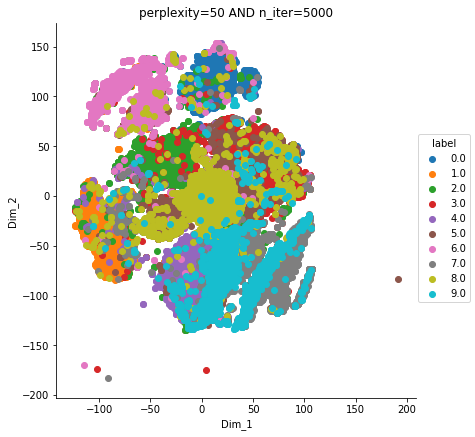

In [39]:
sns.FacetGrid(tsne_df2,hue='label',size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.title("perplexity=50 AND n_iter=5000")
plt.show()

In [ ]:
#TSNE model with perplexity=2

In [28]:
model3=TSNE(n_components=2,random_state=0,perplexity=2)
tsne_data3=model3.fit_transform(standardized_data)

In [29]:
#creating a dataframe which help us in plotting the result data
tsne_data3=np.vstack((tsne_data3.T,label)).T
tsne_df3=pd.DataFrame(data=tsne_data3,columns=("Dim_1","Dim_2","label"))

<function matplotlib.pyplot.show>

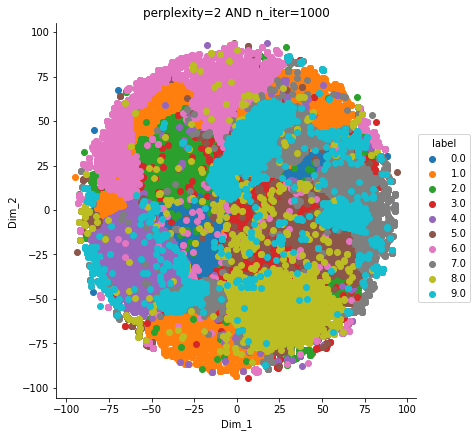

In [30]:
sns.FacetGrid(tsne_df3,hue='label',size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.title("perplexity=2 AND n_iter=1000")
plt.show